Q1. Analysis of Machine Learning model for bias. ​[50 Marks]
● Use the SVM model. (You can use sklearn library)
● Train the model on Bollywood celebrity dataset [​Download Here​: https://www.kaggle.com/havingfun/100-bollywood-celebrity-faces/download]
● Choose any 10 classes from the dataset of your choice
● Report/ Show
○ Class-wise accuracy [10 Marks]
○ Overall accuracy [10 Marks]
○ Training loss vs Testing loss curve wrt epochs.[10 Marks]
○ Check if your model is biased or not by using at-least ​2 metrics​ ex. Confusion Matrix [15
Marks]
○ What type of bias you see(if any), explain. [5 Marks]

In [1]:
# ref: https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d havingfun/100-bollywood-celebrity-faces

100-bollywood-celebrity-faces.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!ls

100-bollywood-celebrity-faces.zip  bollywood_celeb_faces2
bollywood_celeb_faces_0		   kaggle.json
bollywood_celeb_faces_1		   question_one_dataset


In [6]:
!unzip \*.zip

Archive:  100-bollywood-celebrity-faces.zip
replace bollywood_celeb_faces2/Randeep_Hooda/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [7]:
!ls

100-bollywood-celebrity-faces.zip  bollywood_celeb_faces2
bollywood_celeb_faces_0		   kaggle.json
bollywood_celeb_faces_1		   question_one_dataset


In [8]:
!pwd

/content/gdrive/My Drive/Kaggle


In [9]:
!ls

100-bollywood-celebrity-faces.zip  bollywood_celeb_faces2
bollywood_celeb_faces_0		   kaggle.json
bollywood_celeb_faces_1		   question_one_dataset


In [10]:
# Selecting any 10 classes: Shraddha_Kapoor, Shahid_Kapoor, Richa_Chadda, Randeep_Hooda, Tapsee_Pannu, Suniel_Shetty, Shruti_Haasan, Sidharth_Malhotra, Disha_Patani, Arjun_Rampal

In [11]:
!pwd

/content/gdrive/My Drive/Kaggle


In [12]:
#Folders
Shraddha_Kapoor  = '/content/gdrive/My Drive/Kaggle/bollywood_celeb_faces2/Shraddha_Kapoor'
Shahid_Kapoor = '/content/gdrive/My Drive/Kaggle/bollywood_celeb_faces2/Shahid_Kapoor'
Richa_Chadda= '/content/gdrive/My Drive/Kaggle/bollywood_celeb_faces2/Richa_Chadda'
Randeep_Hooda= '/content/gdrive/My Drive/Kaggle/bollywood_celeb_faces2/Randeep_Hood'
Tapsee_Pannu='/content/gdrive/My Drive/Kaggle/bollywood_celeb_faces2/Tapsee_Pannu'
Suniel_Shetty= '/content/gdrive/My Drive/Kaggle/bollywood_celeb_faces2/Suniel_Shetty'
Shruti_Haasan='/content/gdrive/My Drive/Kaggle/bollywood_celeb_faces2/Shruti_Haasan'
Sidharth_Malhotra='/content/gdrive/My Drive/Kaggle/bollywood_celeb_faces2/Sidharth_Malhotra'
Disha_Patani='/content/gdrive/My Drive/Kaggle/bollywood_celeb_faces_0/Disha_Patani'
Arjun_Rampal='/content/gdrive/My Drive/Kaggle/bollywood_celeb_faces_0/Arjun_Rampal'

In [13]:
!ls

100-bollywood-celebrity-faces.zip  bollywood_celeb_faces2
bollywood_celeb_faces_0		   kaggle.json
bollywood_celeb_faces_1		   question_one_dataset


In [14]:
%cd /content/gdrive/My Drive/Kaggle/bollywood_celeb_faces_0

/content/gdrive/My Drive/Kaggle/bollywood_celeb_faces_0


In [15]:
!ls

Aamir_Khan	   Ameesha_Patel     Arshad_Warsi	 Esha_Gupta
Abhay_Deol	   Amitabh_Bachchan  Asin		 Farhan_Akhtar
Abhishek_Bachchan  Amrita_Rao	     Ayushmann_Khurrana  Govinda
Aftab_Shivdasani   Amy_Jackson	     Bhumi_Pednekar	 Hrithik_Roshan
Aishwarya_Rai	   Anil_Kapoor	     Bipasha_Basu	 Huma_Qureshi
Ajay_Devgn	   Anushka_Sharma    Bobby_Deol		 Ileana_D╬У├З├ЦCruz
Akshaye_Khanna	   Anushka_Shetty    Deepika_Padukone
Akshay_Kumar	   Arjun_Kapoor      Disha_Patani
Alia_Bhatt	   Arjun_Rampal      Emraan_Hashmi


In [16]:
%cd /content/gdrive/My Drive/Kaggle/bollywood_celeb_faces_1

/content/gdrive/My Drive/Kaggle/bollywood_celeb_faces_1


In [17]:
!ls

Irrfan_Khan	      Kartik_Aaryan    Mrunal_Thakur	 Prachi_Desai
Jacqueline_Fernandez  Katrina_Kaif     Nana_Patekar	 Preity_Zinta
John_Abraham	      Kiara_Advani     Nargis_Fakhri	 Priyanka_Chopra
Juhi_Chawla	      Kriti_Kharbanda  Naseeruddin_Shah  Rajkummar_Rao
Kajal_Aggarwal	      Kriti_Sanon      Nushrat_Bharucha  Ranbir_Kapoor
Kajol		      Kunal_Khemu      Paresh_Rawal	 R_Madhavan
Kangana_Ranaut	      Lara_Dutta       Parineeti_Chopra
Kareena_Kapoor	      Madhuri_Dixit    Pooja_Hegde
Karisma_Kapoor	      Manoj_Bajpayee   Prabhas


In [18]:
%cd /content/gdrive/My Drive/Kaggle/bollywood_celeb_faces2

/content/gdrive/My Drive/Kaggle/bollywood_celeb_faces2


In [19]:
!ls

Randeep_Hooda	  Shahid_Kapoor      Suniel_Shetty	   Vaani_Kapoor
Rani_Mukerji	  Shah_Rukh_Khan     Sunny_Deol		   Varun_Dhawan
Ranveer_Singh	  Shilpa_Shetty      Sushant_Singh_Rajput  Vicky_Kaushal
Richa_Chadda	  Shraddha_Kapoor    Taapsee_Pannu	   Vidya_Balan
Riteish_Deshmukh  Shreyas_Talpade    Tabu		   Vivek_Oberoi
Saif_Ali_Khan	  Shruti_Haasan      Tamannaah_Bhatia	   Yami_Gautam
Salman_Khan	  Sidharth_Malhotra  Tiger_Shroff	   Zareen_Khan
Sanjay_Dutt	  Sonakshi_Sinha     Tusshar_Kapoor
Sara_Ali_Khan	  Sonam_Kapoor	     Uday_Chopra


In [20]:
%cd /content/gdrive/My Drive/Kaggle/bollywood_celeb_faces2/Shraddha_Kapoor

/content/gdrive/My Drive/Kaggle/bollywood_celeb_faces2/Shraddha_Kapoor


In [21]:
!ls | wc -l # Number of images in Shraddha_Kapoor Dataset

121


In [22]:
%cd /content/gdrive/My Drive/Kaggle/question_one_dataset

/content/gdrive/My Drive/Kaggle/question_one_dataset


In [23]:
!pwd

/content/gdrive/My Drive/Kaggle/question_one_dataset


# Run the program from here

# Overall accuracy: 0.35833333333333334


In [24]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
dir = "/content/gdrive/My Drive/Kaggle/question_one_dataset"

In [25]:
classes = [   'Shraddha_Kapoor',#0
              'Shahid_Kapoor',#1
              'Richa_Chadda',#2
              'Randeep_Hooda',#3
              'Taapsee_Pannu',#4
              'Suniel_Shetty',#5
              'Shruti_Haasan',#6
              'Sidharth_Malhotra',#7
              'Disha_Patani',#8
              'Arjun_Rampal'#9
              ]

          

In [26]:
from google.colab.patches import cv2_imshow

# cv2_imshow(cv2.imread("/content/gdrive/My Drive/Kaggle/question_one_dataset/Shraddha_Kapoor/1.jpg")) # Worked!!!!

# This implies the data is fetched from the google drive. Now we just have to do the learning.

In [27]:
data = []
for clas in classes:
  path = os.path.join(dir, clas)
  label = classes.index(clas)
  print(label)
  for img in os.listdir(path): # Gets the list of all files in the directory
    imagepath = os.path.join(path,img)
    # print(str(imagepath))
    star_image = cv2.imread(imagepath, 0)
    try:
      star_image = cv2.resize(star_image,(250,250))
      image_array = np.array(star_image).flatten()
      data.append([image_array, label])
    except Exception as e:
      pass
    
print(len(data))



0
1
2
3
4
5
6
7
8
9
1198


In [28]:
import random
random.shuffle(data)
X_features = []
Y_labels = []

for x,y in data:
  X_features.append(x)
  Y_labels.append(y)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X_features, Y_labels, test_size=0.1)

In [30]:
print("Sizes of X_train, Y_train, X_test, Y_test")
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

Sizes of X_train, Y_train, X_test, Y_test
1078
120
1078
120


In [31]:
from sklearn.svm import SVC

In [74]:
model = SVC(decision_function_shape='ovo', kernel='rbf')
model.fit(X_train, Y_train)
prediction_test = model.predict(X_test)
accu = model.score(X_test, Y_test)

print("Testing accuracy:",accu)



Testing accuracy: 0.3333333333333333


In [75]:
model = SVC(decision_function_shape='ovo', kernel='rbf')
model.fit(X_train, Y_train)
prediction_train = model.predict(X_train)
train_accu = model.score(X_train, Y_train)

print("Training accuracy:",train_accu)



Training accuracy: 0.7597402597402597


In [76]:
# Testing Metrics
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction_test,
                            target_names=classes))

                   precision    recall  f1-score   support

  Shraddha_Kapoor       0.42      0.33      0.37        15
    Shahid_Kapoor       0.24      0.44      0.31         9
     Richa_Chadda       0.20      0.22      0.21         9
    Randeep_Hooda       0.12      0.22      0.16         9
    Taapsee_Pannu       0.44      0.24      0.31        17
    Suniel_Shetty       0.00      0.00      0.00         6
    Shruti_Haasan       0.57      0.67      0.62        18
Sidharth_Malhotra       0.00      0.00      0.00         9
     Disha_Patani       0.32      0.62      0.42        13
     Arjun_Rampal       0.43      0.20      0.27        15

         accuracy                           0.33       120
        macro avg       0.27      0.29      0.27       120
     weighted avg       0.33      0.33      0.31       120



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
# Training Metrics
from sklearn.metrics import classification_report
print(classification_report(Y_train, prediction_train,
                            target_names=classes))

                   precision    recall  f1-score   support

  Shraddha_Kapoor       0.93      0.75      0.83       104
    Shahid_Kapoor       0.75      0.84      0.79       136
     Richa_Chadda       0.92      0.71      0.80       109
    Randeep_Hooda       0.71      0.75      0.73       106
    Taapsee_Pannu       0.83      0.78      0.80       128
    Suniel_Shetty       1.00      0.38      0.55        66
    Shruti_Haasan       0.78      0.90      0.84       112
Sidharth_Malhotra       0.91      0.69      0.79        91
     Disha_Patani       0.53      0.91      0.67       139
     Arjun_Rampal       0.89      0.63      0.74        87

         accuracy                           0.76      1078
        macro avg       0.82      0.73      0.75      1078
     weighted avg       0.80      0.76      0.76      1078



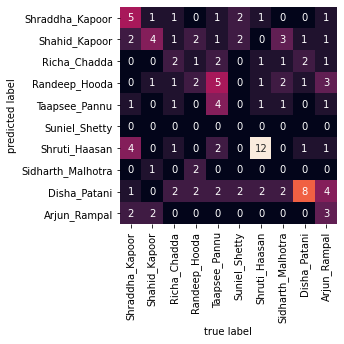

In [80]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, prediction_test)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label');



In [45]:
test_error = []
training_error = []
loss_train=0
loss_test=0
for item in range(len(Y_train)):
  if(model.predict(X_train[item].reshape(1,-1))[0] == Y_train[item]):
    l=0
  else:
    loss_train = loss_train+1
    training_error.append(loss_train)
  

for item in range(len(Y_test)):
  if(model.predict(X_test[item].reshape(1,-1))[0] == Y_test[item]):
    l=0
  else:
    loss_test = loss_test + 1
    test_error.append(loss_test)

   

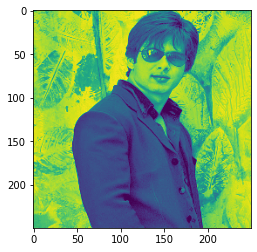

In [37]:
plt.imshow(X_test[9].reshape(250,250))

In [38]:
Y_test[9]

1

In [39]:
a = model.predict(X_test[9].reshape(1,-1))[0]

In [40]:
print(classes[a])

Shahid_Kapoor


In [41]:
print (a)

1


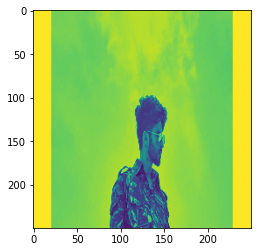

In [ ]:
plt.imshow(X_test[70].reshape(250,250))

In [ ]:
b = model.predict(X_test[9].reshape(1,-1))[0]

In [ ]:
print(classes[b])

Shahid_Kapoor


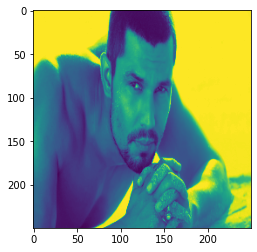

In [ ]:
plt.imshow(X_test[25].reshape(250,250))

In [ ]:
c = model.predict(X_test[9].reshape(1,-1))[0]

In [ ]:
print(classes[c])

Shahid_Kapoor


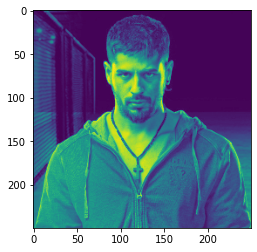

In [ ]:
plt.imshow(X_train[400].reshape(250,250))

In [ ]:
d = model.predict(X_train[400].reshape(1,-1))[0]

In [ ]:
print(classes[d])

Disha_Patani


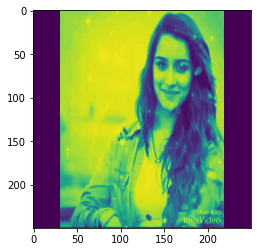

In [ ]:
plt.imshow(X_train[363].reshape(250,250))

In [ ]:
e = model.predict(X_train[363].reshape(1,-1))[0]
print(classes[e])

Shraddha_Kapoor


In [ ]:
# so on the training dataset it is performing very well

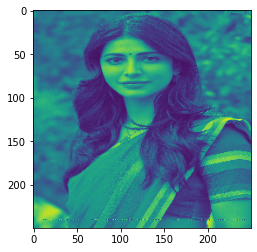

In [ ]:
plt.imshow(X_test[51].reshape(250,250))

In [ ]:
f = model.predict(X_test[51].reshape(1,-1))[0]
print(classes[f])

Shruti_Haasan


Shahid_Kapoor


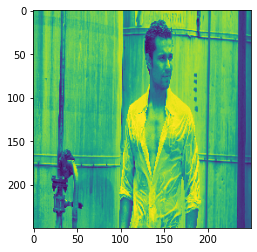

In [ ]:
plt.imshow(X_test[67].reshape(250,250))
g = model.predict(X_test[67].reshape(1,-1))[0]
print(classes[g])

# Training Loss vs Testing Loss Curve

# Class Wise
Lets perform class wise classification and check accuracy. We need to take 2 classes for each training. Here below, classwise accuracy is checked between Shraddha_Kapoor and Taapsee_Pannu, accuracy: 0.6666666666666666

In [ ]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
dir = "/content/gdrive/My Drive/Kaggle/question_one_dataset"

classes = [   'Shraddha_Kapoor',#0
              'Taapsee_Pannu',#1

              ]
data_0 = []
for clas in classes:
  path = os.path.join(dir, clas)
  label = classes.index(clas)
  print(label)
  for img in os.listdir(path): # Gets the list of all files in the directory
    imagepath = os.path.join(path,img)
    # print(str(imagepath))
    star_image = cv2.imread(imagepath, 0)
    try:
      star_image = cv2.resize(star_image,(250,250))
      image_array = np.array(star_image).flatten()
      data_0.append([image_array, label])
    except Exception as e:
      pass
    
print(len(data_0))




0
1
264


In [ ]:
import random
random.shuffle(data_0)
X_features = []
Y_labels = []

for x,y in data_0:
  X_features.append(x)
  Y_labels.append(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X_features, Y_labels, test_size=0.1)

In [ ]:
print("Sizes of X_train, Y_train, X_test, Y_test")
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

Sizes of X_train, Y_train, X_test, Y_test
237
27
237
27


In [ ]:
from sklearn.svm import SVC
model = SVC(C=0.1, kernel='linear')
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
accu = model.score(X_test, Y_test)

print("accuracy:",accu)



accuracy: 0.6666666666666666


But what we envision is the accuracies of each of the actor's image should be compared with other. making total of 10 X 10 runs of the training and accuracies.

In [ ]:
array1 = [   'Shraddha_Kapoor',#0
              'Shahid_Kapoor',#1
              'Richa_Chadda',#2
              'Randeep_Hooda',#3
              'Taapsee_Pannu',#4
              'Suniel_Shetty',#5
              'Shruti_Haasan',#6
              'Sidharth_Malhotra',#7
              'Disha_Patani',#8
              'Arjun_Rampal'#9
              ]

array2 = [   'Shraddha_Kapoor',#0
              'Shahid_Kapoor',#1
              'Richa_Chadda',#2
              'Randeep_Hooda',#3
              'Taapsee_Pannu',#4
              'Suniel_Shetty',#5
              'Shruti_Haasan',#6
              'Sidharth_Malhotra',#7
              'Disha_Patani',#8
              'Arjun_Rampal'#9
              ]


def important_function(actor1, actor2):
  print("------------------------------------------------")
  print("-----------Doing for ---------")
  print(str(actor1)+" and "+str(actor2))
  print("------------------------------------------------")
    
  classes = [   str(actor1),#0
                str(actor2),#1

                ]
  data_0 = []
  for clas in classes:
    path = os.path.join(dir, clas)
    label = classes.index(clas)
    print(label)
    for img in os.listdir(path): # Gets the list of all files in the directory
      imagepath = os.path.join(path,img)
      # print(str(imagepath))
      star_image = cv2.imread(imagepath, 0)
      try:
        star_image = cv2.resize(star_image,(250,250))
        image_array = np.array(star_image).flatten()
        data_0.append([image_array, label])
      except Exception as e:
        pass
      
  print(len(data_0))
  random.shuffle(data_0)
  X_features = []
  Y_labels = []

  for x,y in data_0:
    X_features.append(x)
    Y_labels.append(y)
  from sklearn.model_selection import train_test_split
  X_train,X_test, Y_train, Y_test = train_test_split(X_features, Y_labels, test_size=0.1)
  print("Sizes of X_train, Y_train, X_test, Y_test")
  print(len(X_train))
  print(len(X_test))
  print(len(Y_train))
  print(len(Y_test))
  from sklearn.svm import SVC
  model = SVC(C=0.1, kernel='linear')
  model.fit(X_train, Y_train)
  prediction = model.predict(X_test)
  accu = model.score(X_test, Y_test)

  print("accuracy:",accu)







for element1 in array1:
  for element2 in array2:
    if(str(element1)==str(element2)):
      pass
    else:
      important_function(element1, element2)  

------------------------------------------------
-----------Doing for ---------
Shraddha_Kapoor and Shahid_Kapoor
------------------------------------------------
0
1
264
Sizes of X_train, Y_train, X_test, Y_test
237
27
237
27
accuracy: 0.7407407407407407
------------------------------------------------
-----------Doing for ---------
Shraddha_Kapoor and Richa_Chadda
------------------------------------------------
0
1
237
Sizes of X_train, Y_train, X_test, Y_test
213
24
213
24
accuracy: 0.75
------------------------------------------------
-----------Doing for ---------
Shraddha_Kapoor and Randeep_Hooda
------------------------------------------------
0
1
234
Sizes of X_train, Y_train, X_test, Y_test
210
24
210
24
accuracy: 0.5833333333333334
------------------------------------------------
-----------Doing for ---------
Shraddha_Kapoor and Taapsee_Pannu
------------------------------------------------
0
1
264
Sizes of X_train, Y_train, X_test, Y_test
237
27
237
27
accuracy: 0.74074074